In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.patches as mpatches

In [2]:
df_confirmed = pd.read_csv('Data/COVID19_Confirmed.csv')
df_deaths = pd.read_csv('Data/COVID19_Deaths.csv')

In [3]:
df_confirmed['total_cases'] = df_confirmed.sum(axis=1)
df_deaths['total_deaths'] = df_deaths.sum(axis=1)

### Cleaning data

In [4]:
df_confirmed.rename(columns={'Unnamed: 0':'Provincia'}, inplace=True)
df_confirmed.set_index('Provincia',inplace = True)
df_deaths.rename(columns={'Unnamed: 0':'Provincia'}, inplace=True)
df_deaths.set_index('Provincia',inplace = True)


# Updated

In [5]:
print('Last information update: {}'.format((date.today()-timedelta(days=1)).strftime("%d/%m/%Y")))

Last information update: 06/04/2020


# Infected people

In [6]:
print('Infected people: {}'.format(df_confirmed['total_cases'].sum()))

Infected people: 1628


# Deaths

In [7]:
print('Deaths: {}'.format(df_deaths['total_deaths'].sum()))

Deaths: 53


# Infected people by province/region

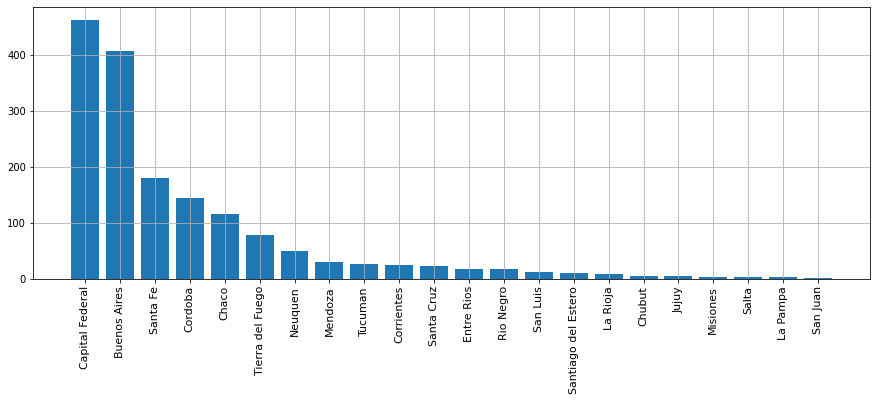

Provincia
Capital Federal        462
Buenos Aires           407
Santa Fe               181
Cordoba                144
Chaco                  116
Tierra del Fuego        78
Neuquen                 49
Mendoza                 30
Tucuman                 27
Corrientes              25
Santa Cruz              23
Entre Rios              17
Rio Negro               17
San Luis                12
Santiago del Estero     10
La Rioja                 9
Chubut                   5
Jujuy                    5
Misiones                 4
Salta                    3
La Pampa                 3
San Juan                 1
Name: total_cases, dtype: int64

In [8]:
has_cases = df_confirmed['total_cases'] > 0
provinces_with_cases = df_confirmed[has_cases].sort_values(by=['total_cases'], ascending=False)

plt.figure(figsize=(15,5))
plt.bar(provinces_with_cases.index,provinces_with_cases['total_cases'])
plt.xticks(provinces_with_cases.index, rotation='vertical', size=11)
plt.grid()
plt.show()

provinces_with_cases['total_cases']

# Deaths at the provinces/regions with infected people

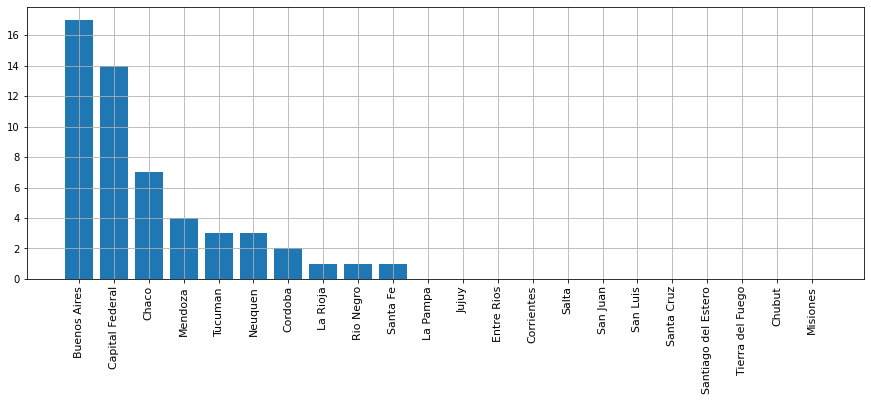

Provincia
Buenos Aires           17
Capital Federal        14
Chaco                   7
Mendoza                 4
Tucuman                 3
Neuquen                 3
Cordoba                 2
La Rioja                1
Rio Negro               1
Santa Fe                1
La Pampa                0
Jujuy                   0
Entre Rios              0
Corrientes              0
Salta                   0
San Juan                0
San Luis                0
Santa Cruz              0
Santiago del Estero     0
Tierra del Fuego        0
Chubut                  0
Misiones                0
Name: total_deaths, dtype: int64

In [9]:
deaths_of_infected_provinces = df_deaths[has_cases].sort_values(by=['total_deaths'], ascending=False)

plt.figure(figsize=(15,5))
plt.bar(deaths_of_infected_provinces.index,deaths_of_infected_provinces['total_deaths'])
plt.xticks(deaths_of_infected_provinces.index, rotation='vertical', size=11)
plt.grid()
plt.show()


deaths_of_infected_provinces['total_deaths']

# Provinces with infected people and no deaths

In [10]:
df_confirmed.T[deaths_of_infected_provinces.index.values].T.sort_values(by=['total_cases'], ascending=False)['total_cases']

Provincia
Capital Federal        462
Buenos Aires           407
Santa Fe               181
Cordoba                144
Chaco                  116
Tierra del Fuego        78
Neuquen                 49
Mendoza                 30
Tucuman                 27
Corrientes              25
Santa Cruz              23
Entre Rios              17
Rio Negro               17
San Luis                12
Santiago del Estero     10
La Rioja                 9
Chubut                   5
Jujuy                    5
Misiones                 4
Salta                    3
La Pampa                 3
San Juan                 1
Name: total_cases, dtype: int64

# Mortality of provinces/regions with infected people

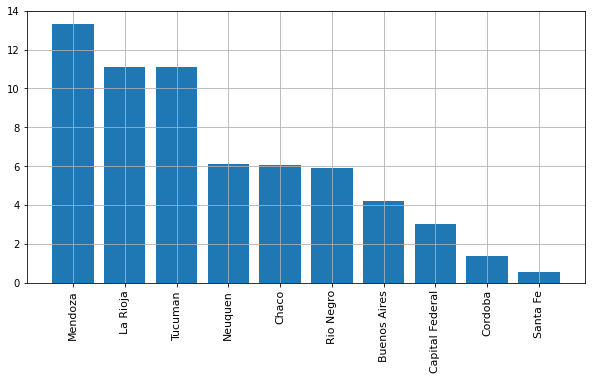

,conf total_cases,death total_deaths,% death
Provincia,,,
Mendoza,30,4,13.333333
La Rioja,9,1,11.111111
Tucuman,27,3,11.111111
Neuquen,49,3,6.122449
Chaco,116,7,6.034483
Rio Negro,17,1,5.882353
Buenos Aires,407,17,4.176904
Capital Federal,462,14,3.030303
Cordoba,144,2,1.388889


In [11]:
tmp_confirmed = provinces_with_cases.copy()
tmp_deaths = deaths_of_infected_provinces.copy()
tmp_confirmed.columns =  ['conf ' + col_name for col_name in tmp_confirmed.columns]
tmp_deaths.columns =  ['death ' + col_name for col_name in tmp_deaths.columns]
df_confirmed_and_deaths = pd.concat([tmp_confirmed, tmp_deaths], axis=1, join='inner')

df_confirmed_and_deaths['% death'] = (df_confirmed_and_deaths['death total_deaths'] / df_confirmed_and_deaths['conf total_cases']) * 100 
df_confirmed_and_deaths.sort_values(by=['% death'], ascending=False, inplace = True)

has_deaths_percentage = df_confirmed_and_deaths['% death'] > 0
provinces_with_deaths_percentage = df_confirmed_and_deaths[has_deaths_percentage] 

plt.figure(figsize=(10,5))
plt.bar(provinces_with_deaths_percentage.index,provinces_with_deaths_percentage['% death'])
plt.xticks(provinces_with_deaths_percentage.index, rotation='vertical', size=11)
plt.grid()
plt.show()


provinces_with_deaths_percentage[['conf total_cases', 'death total_deaths','% death']]

# Daily contagion and death curve

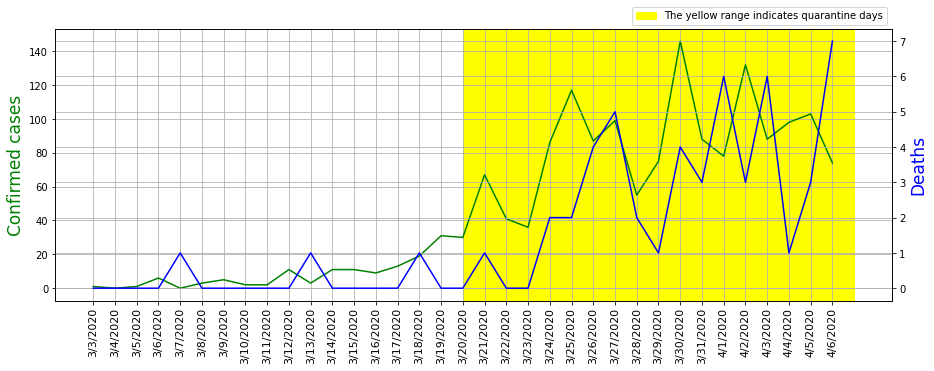

In [12]:
df_confirmed_transposed = df_confirmed.drop('total_cases',axis=1).transpose()
df_deaths_transposed = df_deaths.drop('total_deaths',axis=1).transpose()
df_deaths_transposed['total_deaths'] = df_deaths_transposed.sum(axis = 1)
df_confirmed_transposed['total_cases'] = df_confirmed_transposed.sum(axis = 1)
today = date.today()


plt.figure(figsize=(15,5))

plt.plot(df_confirmed_transposed.index, df_confirmed_transposed['total_cases'], color='g')
plt.ylabel('Confirmed cases', color='g',size=17)
plt.axvspan('3/20/2020',today.strftime("%m/%d/%Y"),color='yellow',fill=True)
plt.grid()

plt.xticks(rotation='vertical',size=11)
ax2 = plt.gca().twinx()

plt.plot(df_deaths_transposed.index, df_deaths_transposed['total_deaths'], color='b')
plt.ylabel('Deaths', color='b',size=17)
plt.grid()

quarantine = mpatches.Patch(color='yellow',label='The yellow range indicates quarantine days')
plt.legend(handles=[quarantine],bbox_to_anchor = (1,1.1))

plt.show()

# Evolutive contagion and death curve

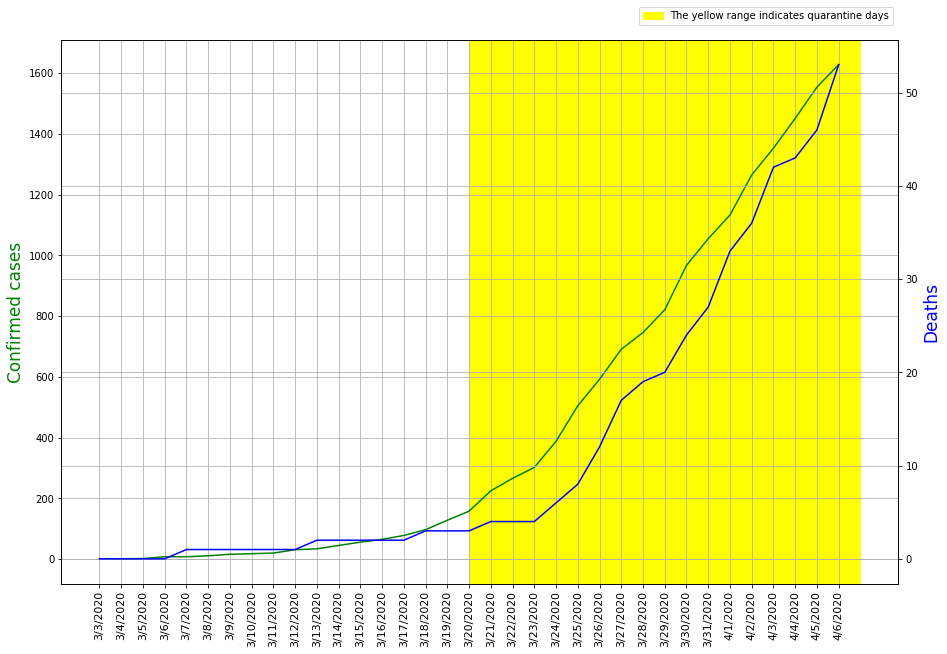

In [13]:
today = date.today()
df_confirmed_transposed['evolutive_cases'] = df_confirmed_transposed['total_cases'].cumsum()
df_deaths_transposed['evolutive_deaths'] = df_deaths_transposed['total_deaths'].cumsum()



plt.figure(figsize=(15,10))

plt.plot(df_confirmed_transposed.index, df_confirmed_transposed['evolutive_cases'], color='g')
plt.ylabel('Confirmed cases', color='g',size=17)
plt.axvspan('3/20/2020',today.strftime("%m/%d/%Y"),color='yellow',fill=True)
plt.grid()

plt.xticks(rotation='vertical',size=11)
ax2 = plt.gca().twinx()

plt.plot(df_deaths_transposed.index, df_deaths_transposed['evolutive_deaths'], color='b')
plt.ylabel('Deaths', color='b',size=17)
plt.grid()

quarantine = mpatches.Patch(color='yellow',label='The yellow range indicates quarantine days')
plt.legend(handles=[quarantine],bbox_to_anchor = (1.,1.07))

plt.show()

# Provinces

##  Reported contagions by day

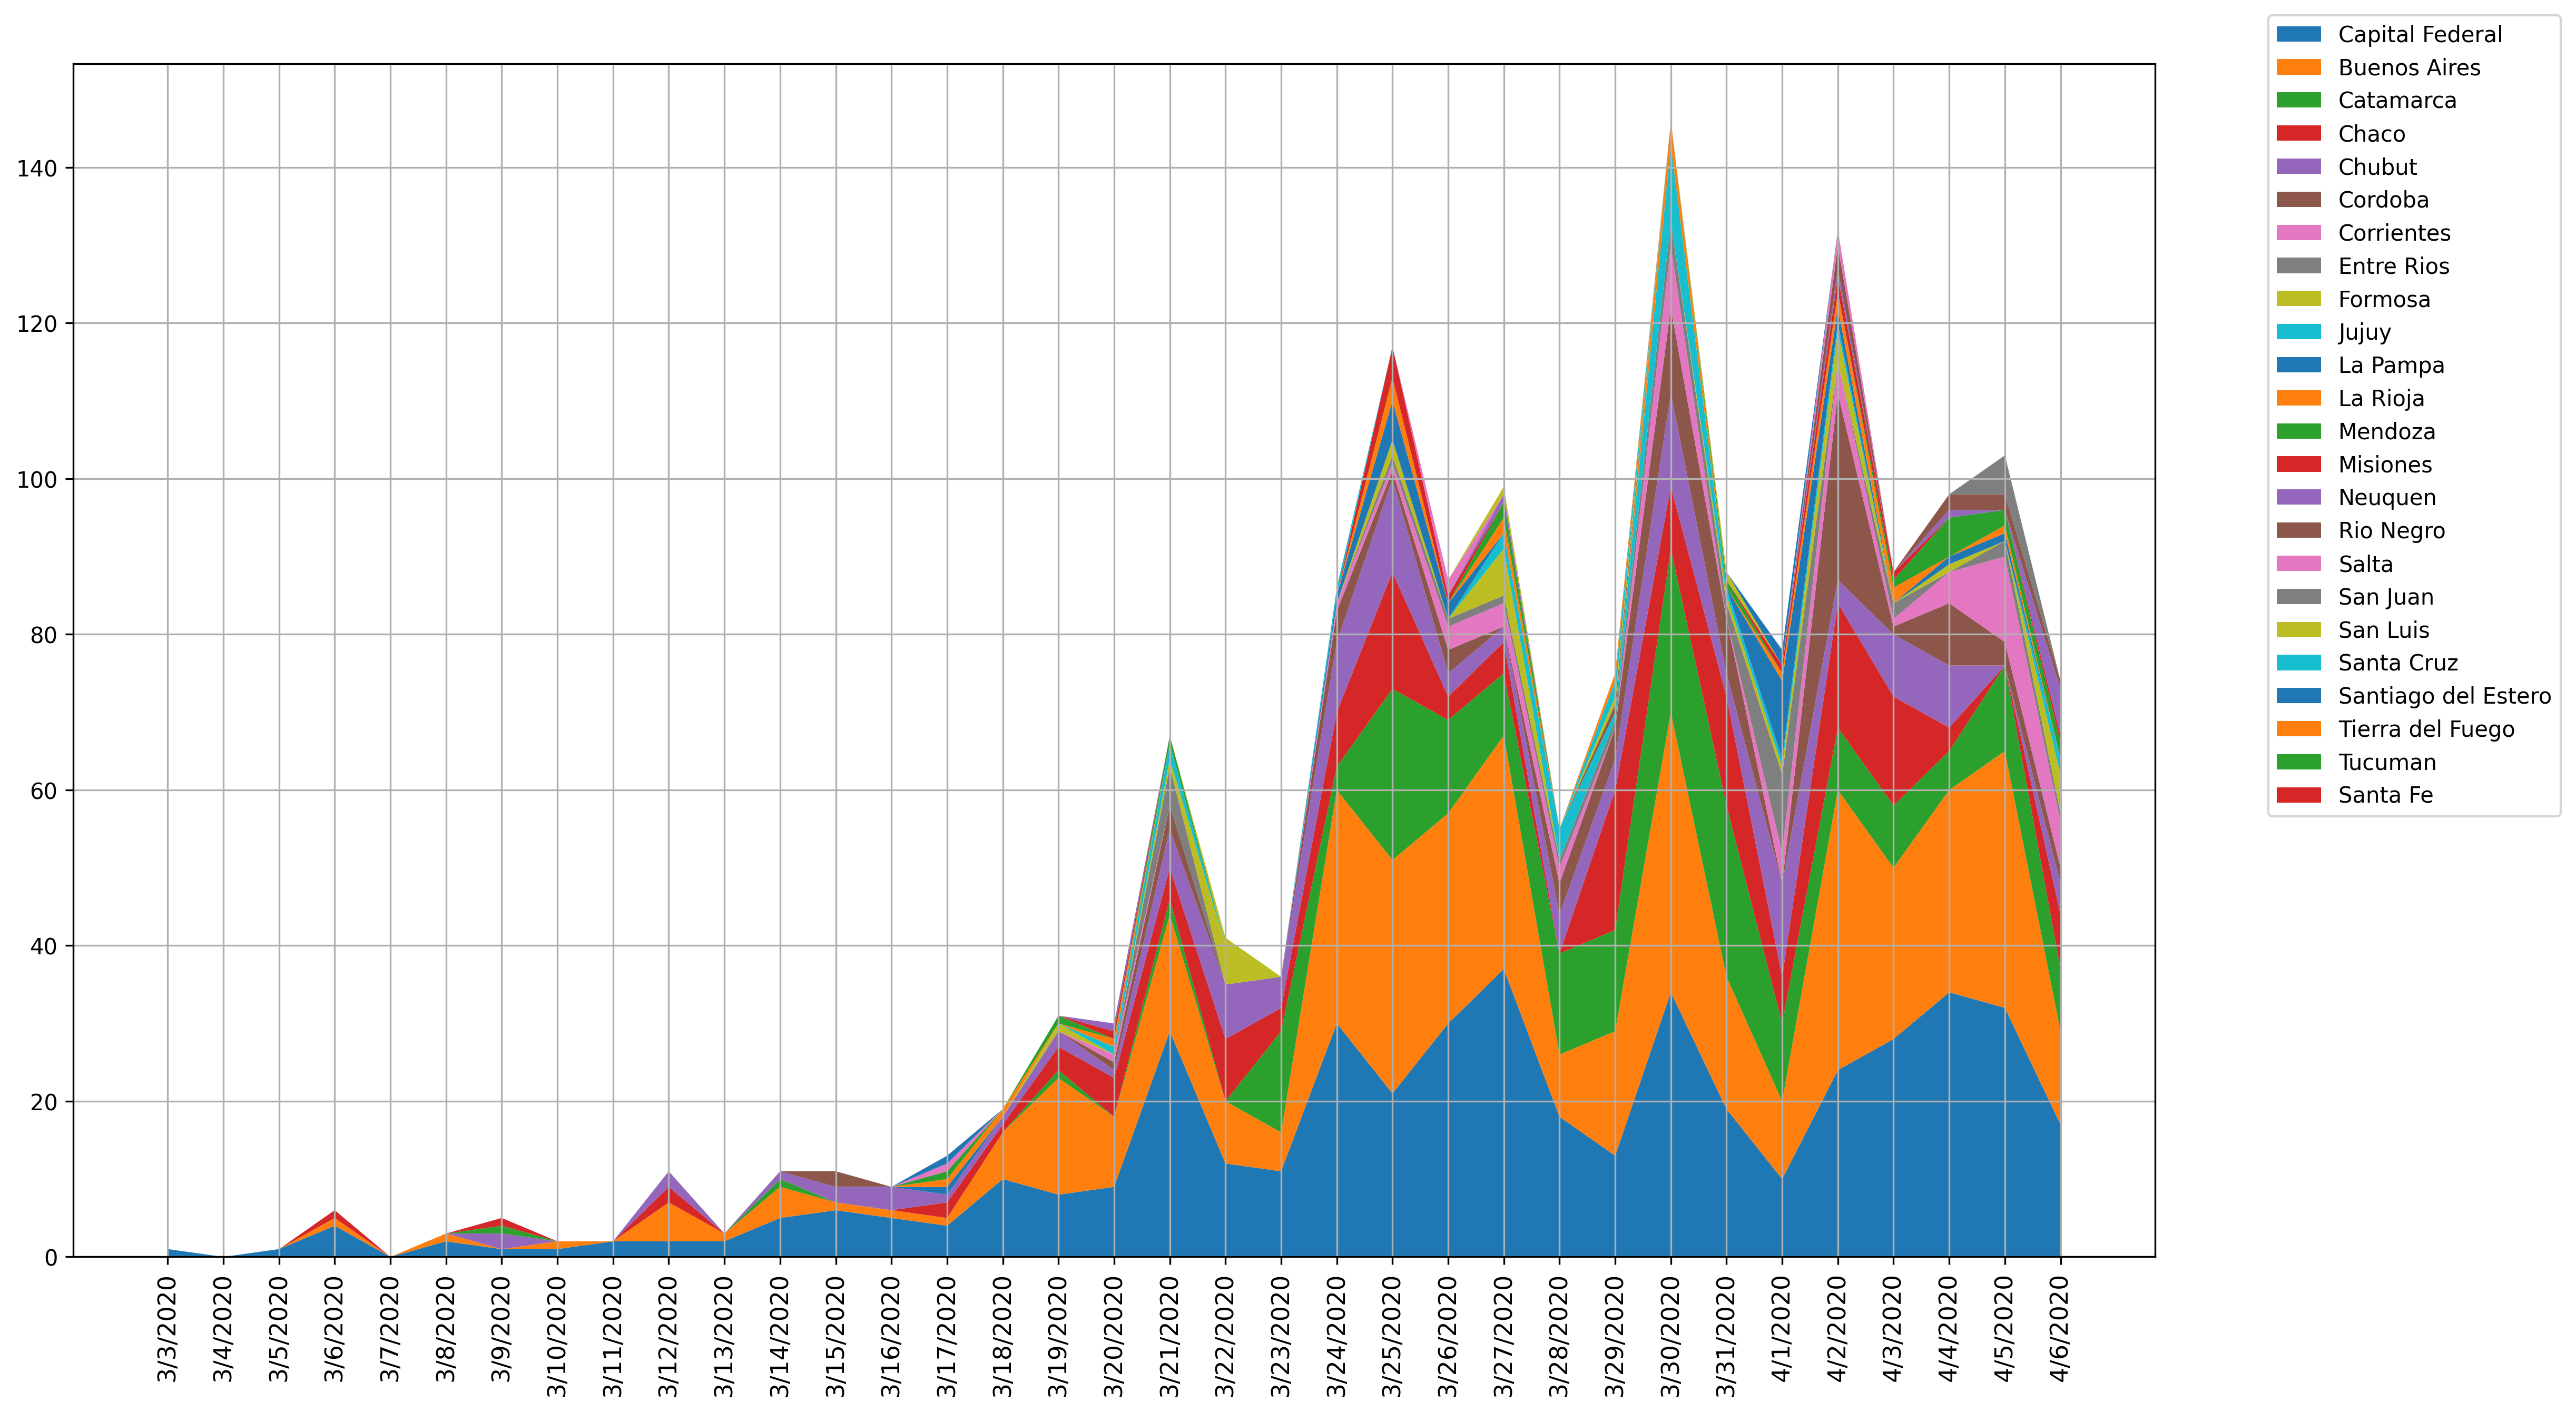

In [14]:
y = df_confirmed.sort_values(by=['total_cases'], ascending=False).drop(columns=['total_cases']).values
x = df_confirmed_transposed.drop(columns=['total_cases','evolutive_cases']).index.values


labels = df_confirmed.index.values

plt.figure(figsize=(17,10),dpi=300)
plt.stackplot(x,y, labels=labels)
plt.legend(bbox_to_anchor = (1.2,1.05))
plt.xticks(rotation='vertical', size=11)
plt.grid()
plt.show()

## Reported deaths by day

In [33]:
has_deaths = df_deaths['total_deaths'] > 0 
y = df_deaths.sort_values(by=['total_deaths'], ascending=False).drop(columns=['total_deaths'])[has_deaths].values
x = df_deaths_transposed.drop(columns=['total_deaths','evolutive_deaths']).index.values

y
# labels = df_deaths.index.values
# plt.figure(figsize=(17,10),dpi=300)
# plt.stackplot(x,y, labels=labels)
# plt.legend(bbox_to_anchor = (1.2,1.05))
# plt.xticks(rotation='vertical', size=11)
# plt.grid()
# plt.show()

/home/facundo/Escritorio/covid/analisis/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 2, 0, 1, 0, 2, 0, 2, 1, 3, 1, 1, 2],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 3, 1, 0, 0, 0, 1, 0, 0, 0, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0

## Evolutive contagion curve

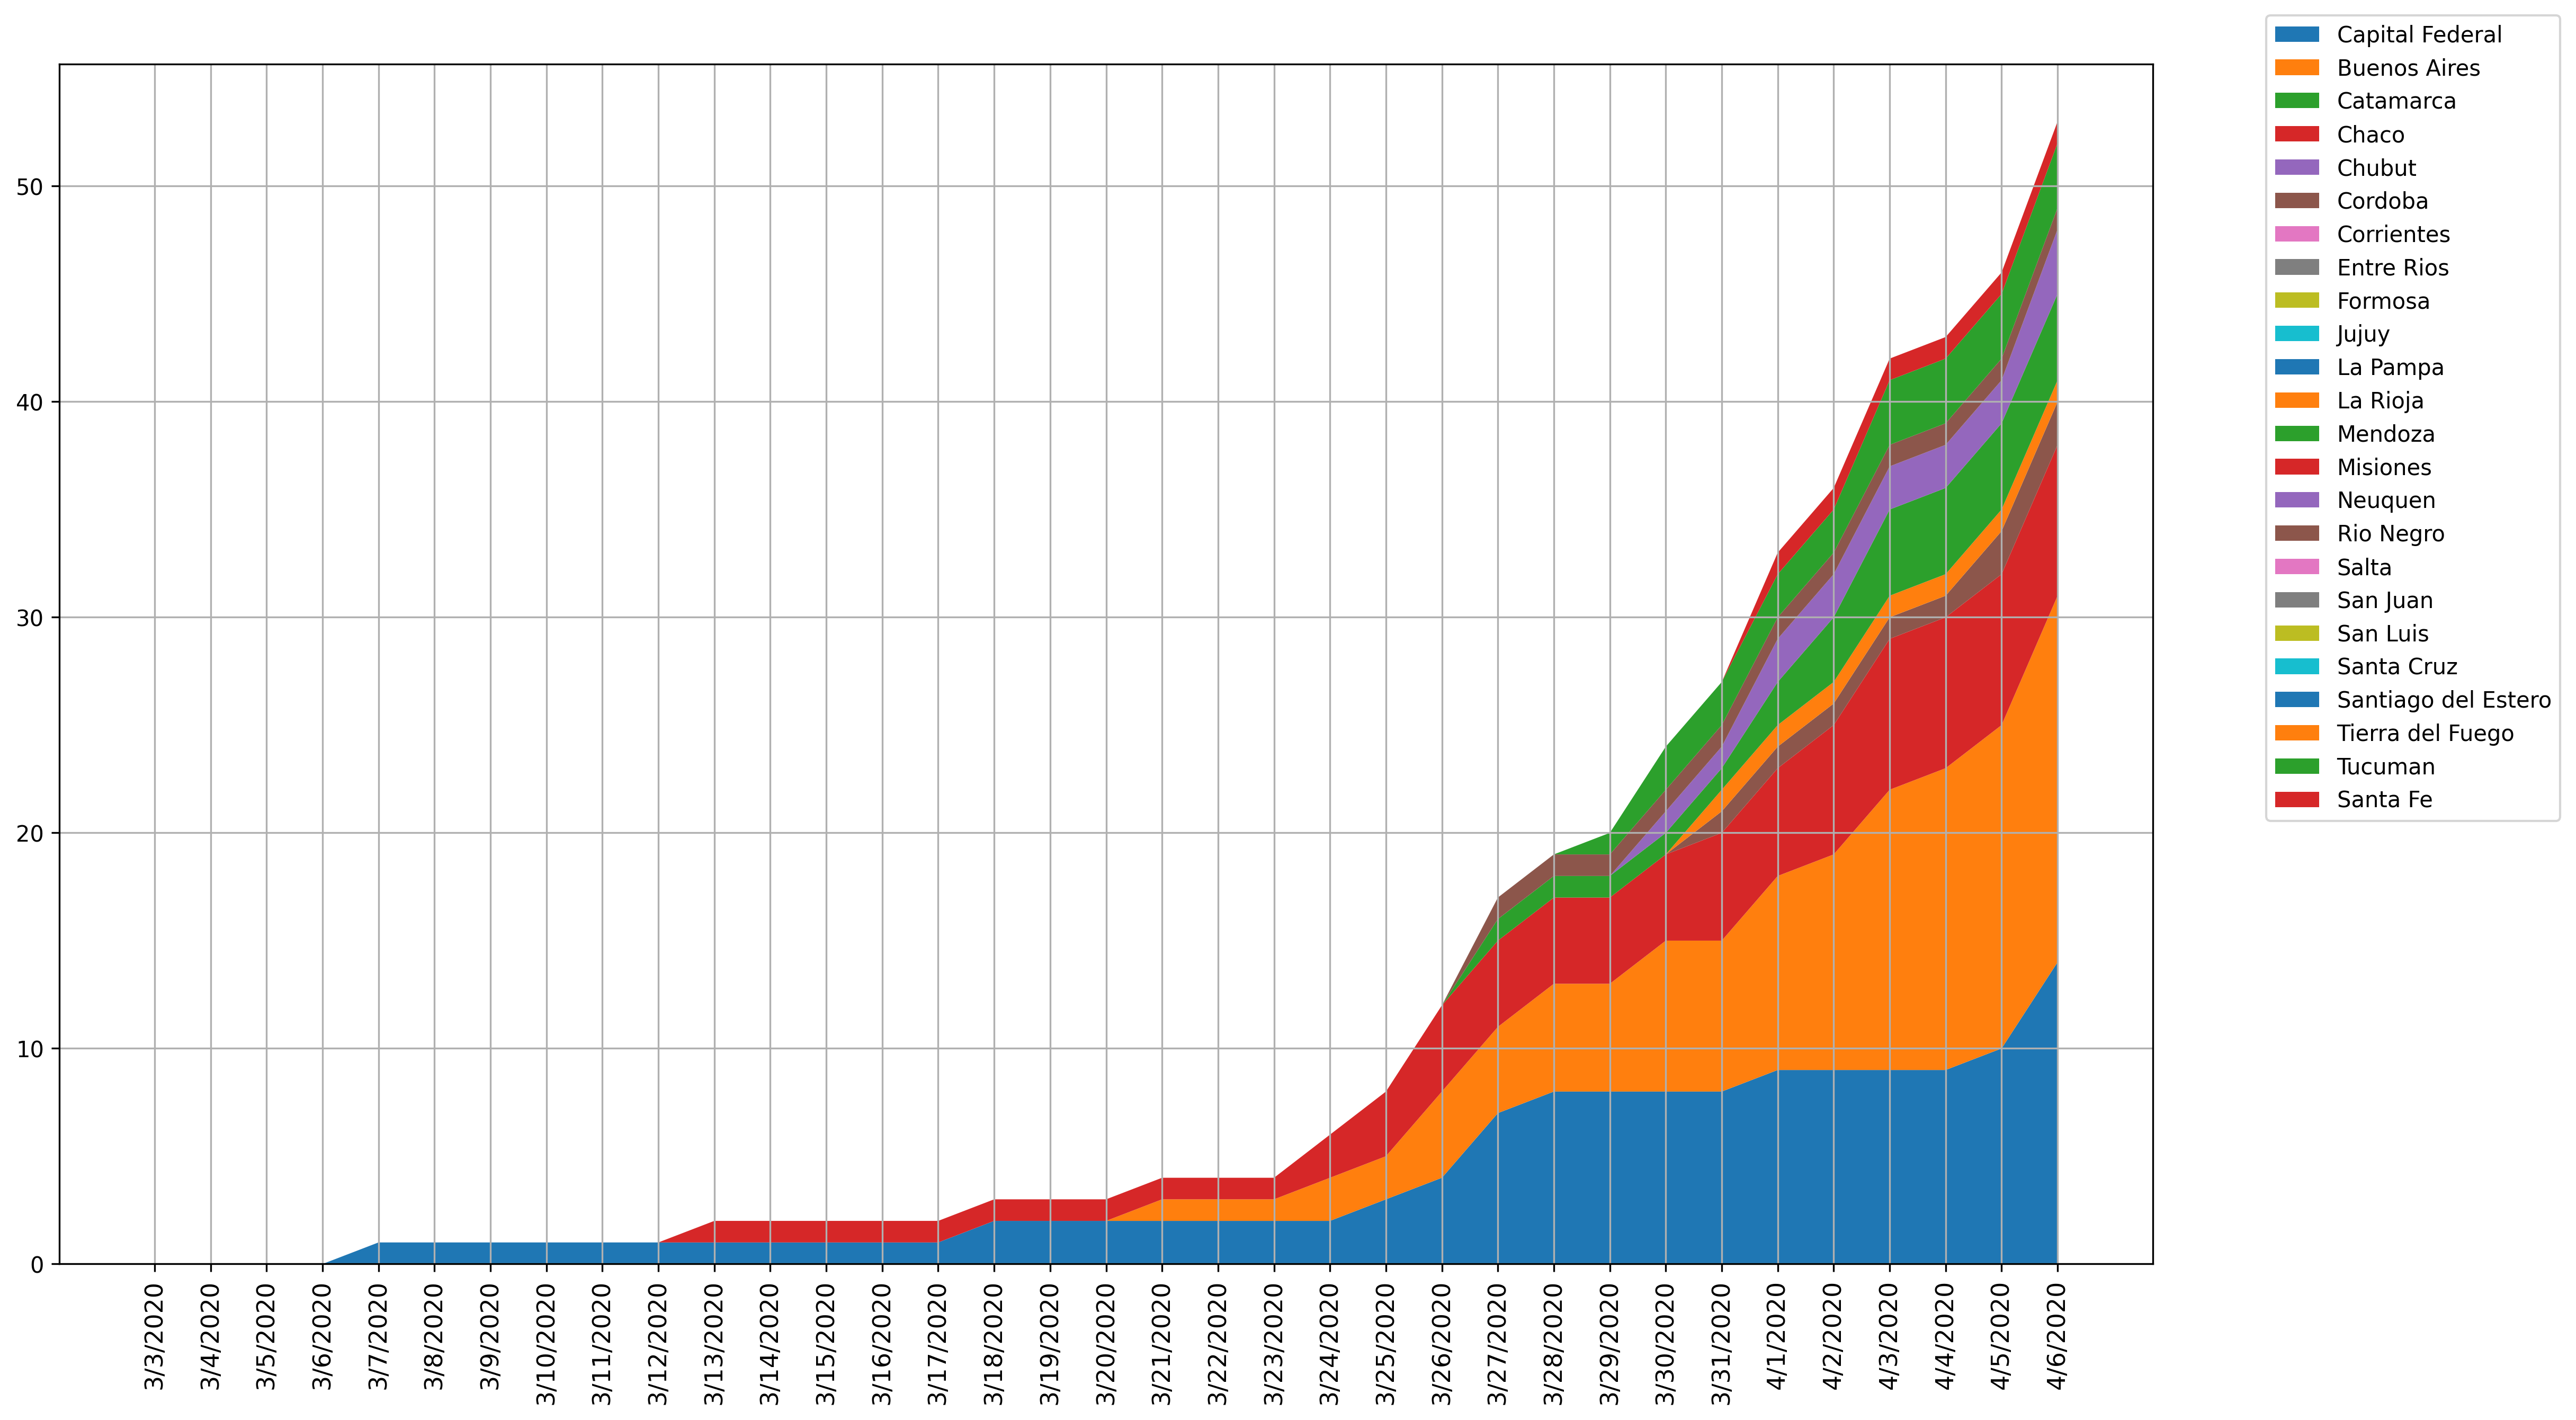

In [44]:
x = df_deaths_transposed['evolutive_deaths'].index.values
y = df_deaths_transposed.cumsum(axis=0).drop(columns=['evolutive_deaths','total_deaths']).T
                                           
labels = df_deaths.index.values
plt.figure(figsize=(17,10),dpi=300)
plt.stackplot(x,y, labels=labels)
plt.legend(bbox_to_anchor = (1.2,1.05))
plt.xticks(rotation='vertical', size=11)
plt.grid()
plt.show()

## Evolutive death curve